# Proyecto CSV Python
## Análisis Women's International Football Results

### Jorge Trujillo

#### Introducción

Se busca analizar la evolución de los resultados de los partidos de fútbol de mujeres haciendo uso del dataset **Women's International Football Results** que se encuentra en `Kaggle`.
El dataset usado lo puede encontrar [aquí](https://www.kaggle.com/martj42/womens-international-football-results)

##### Dataframe

Actualmente, el conjunto de datos incluye 4.163 resultados de fútbol internacional femenino. Todos los resultados de los principales torneos deben estar completos. Se incluyen algunos amistosos internacionales, particularmente torneos.

Las columnas del dataset son:

- `date` - fecha del partido en formato YYYY-mm-dd
- `home_team` - el nombre del equipo que juega en casa
- `away_team` - el nombre del equipo visitante
- `home_score` - el resultado del partido del equipo de casa tomando en cuenta tiempos extra, no se incluyen penaltis finales
- `away_score` - el resultado del partido del equipo visitante tomando en cuenta tiempos extra, no se incluyen penaltis finales
- `tournament` - el nombre del torneo
- `city` - el nombre de la ciudad, pueblo o administración donde se jugó el partido
- `country` - el nombre del país donde se jugó el partido
- `neutral` - TRUE/FALSE columna que indica si el partido se jugó en un lugar neutral, es decir un país donde los dos equipos son visitantes


### Muestra del dataset

In [27]:
import pandas as pd
import os
import xlsxwriter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path_csv = './data/results.csv'
path_guardar_pickle = './pickle/results.pickle'

#df = pd.read_csv(path_csv)
#df.to_pickle(path_guardar_pickle)
df2 = pd.read_pickle(path_guardar_pickle)
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True
...,...,...,...,...,...,...,...,...,...
4158,2020-03-10,France,Netherlands,3,3,Tournoi de France,Valenciennes,France,False
4159,2020-03-10,Belgium,Denmark,0,4,Algarve Cup,Lagos,Portugal,True
4160,2020-03-10,New Zealand,Norway,1,2,Algarve Cup,Faro/Loulé,Portugal,True
4161,2020-03-11,England,Spain,0,1,SheBelieves Cup,Frisco,United States,True


### 1. Porcentaje de partidos en lugares neutrales y no neutrales

In [28]:
neutral = df2['neutral'].copy()
value_counts=neutral.value_counts()
value_counts

False    2324
True     1839
Name: neutral, dtype: int64

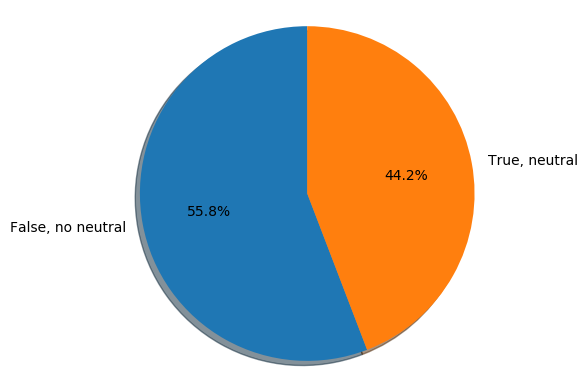

In [29]:
fig1, ax1 = plt.subplots()
labels = ['False, no neutral','True, neutral']
ax1.pie(value_counts, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

### 2. Número de partidos por año

In [30]:
df2_date = df2['date'].copy()
year_only =[]
for date in df2_date:
    year_only.append(date[0:4])

serie = pd.Series(year_only, name='year')
partidos_por_anio = serie.value_counts().sort_index()
partidos_por_anio

1969      4
1975     10
1977     10
1979     16
1980     18
1981     16
1982     18
1983     54
1984      9
1985     24
1986     38
1987     20
1988     44
1989     42
1990     41
1991     92
1992     40
1993     53
1994     89
1995    124
1996    110
1997     50
1998    103
1999    136
2000    145
2001     61
2002    112
2003    179
2004    150
2005     61
2006    195
2007    130
2008    174
2009     74
2010    174
2011    154
2012    196
2013     79
2014    122
2015    162
2016    194
2017    188
2018    349
2019     80
2020     23
Name: year, dtype: int64

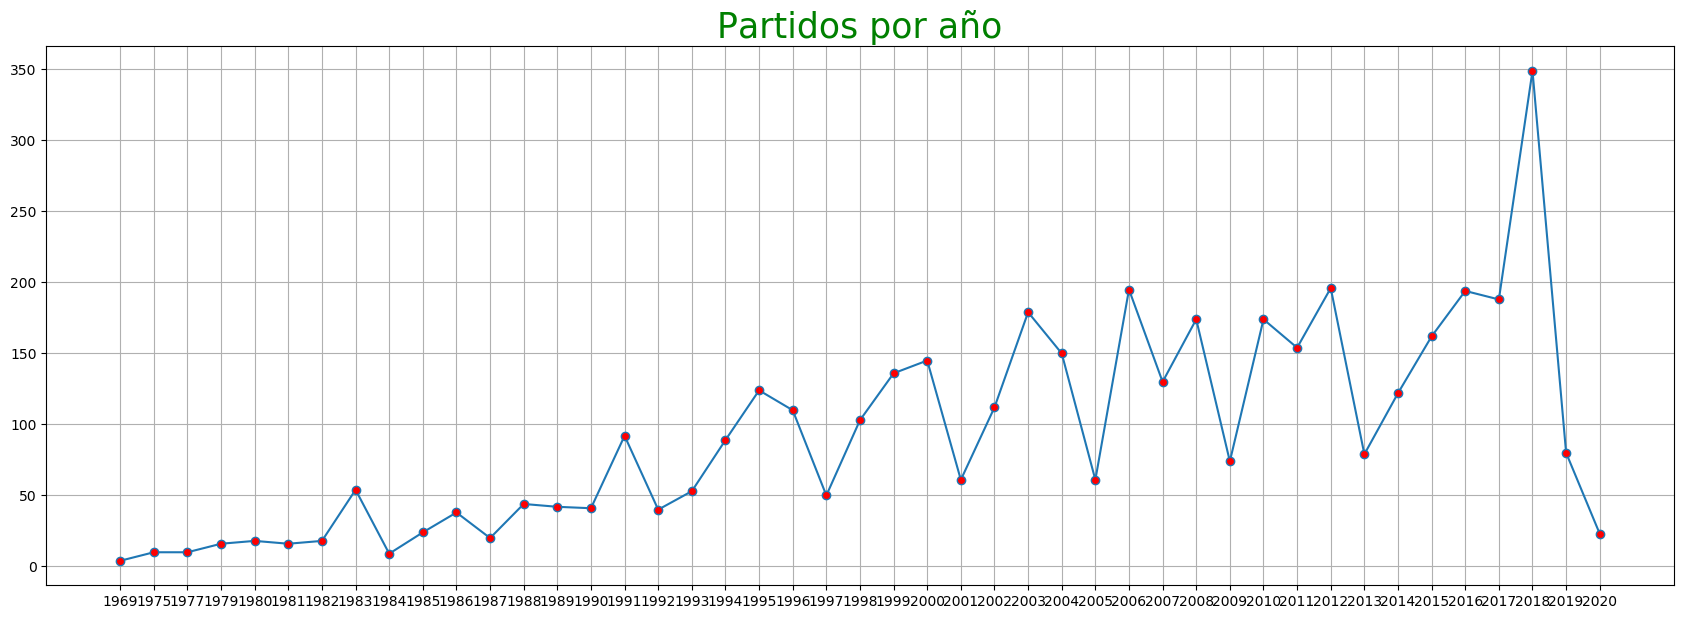

In [31]:
plt.figure(figsize=(21,7))
plt.plot(partidos_por_anio.index,partidos_por_anio, marker='o',  markerfacecolor='red')
plt.grid(True)
plt.title('Partidos por año', color='g', size = 25)
plt.show()

### 3. Número de goles por año

In [32]:
df2_goles = df2.copy()
df2_goles['date'] = serie
a = df2_goles.groupby('date').sum()
total_goles = a['home_score']+a['away_score']
total_goles

date
1969      14
1975      35
1977      30
1979      40
1980      40
1981      50
1982      58
1983     187
1984      17
1985      94
1986     140
1987      56
1988     116
1989     162
1990     109
1991     437
1992     120
1993     234
1994     425
1995     551
1996     387
1997     208
1998     595
1999     626
2000     574
2001     300
2002     426
2003     787
2004     549
2005     213
2006     763
2007     440
2008     566
2009     252
2010     650
2011     523
2012     658
2013     274
2014     429
2015     534
2016     629
2017     668
2018    1353
2019     222
2020      54
dtype: int64

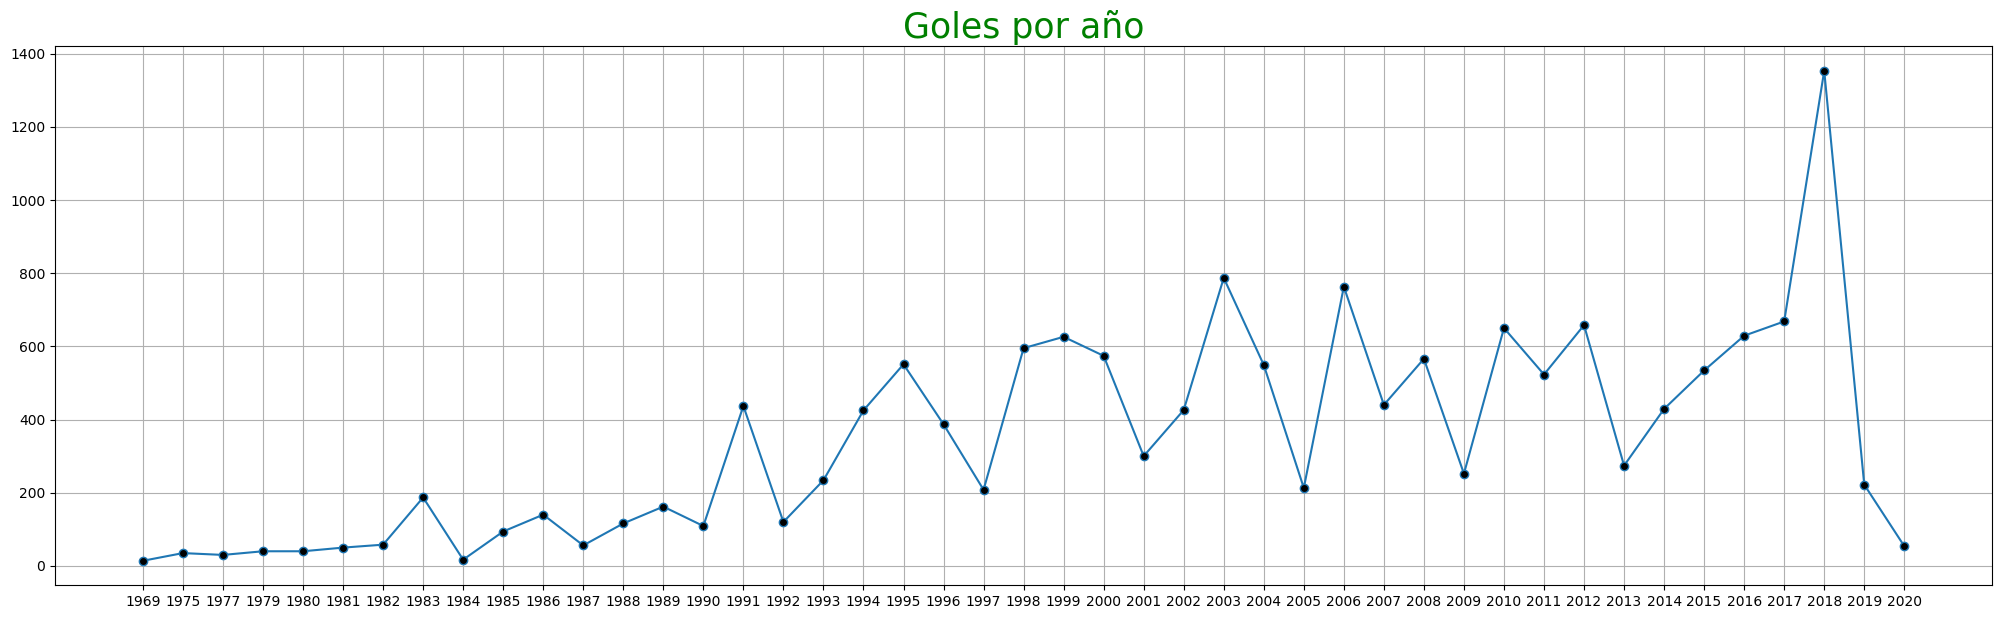

In [33]:
plt.figure(figsize=(25,7))
plt.plot(total_goles.index,total_goles, marker='o',  markerfacecolor='black')
plt.grid(True)
plt.title('Goles por año', color='g', size = 25)
plt.show()

### 5. Promedio de goles por partido por año

In [34]:
promedio_goles = total_goles/partidos_por_anio
promedio_goles

date
1969    3.500000
1975    3.500000
1977    3.000000
1979    2.500000
1980    2.222222
1981    3.125000
1982    3.222222
1983    3.462963
1984    1.888889
1985    3.916667
1986    3.684211
1987    2.800000
1988    2.636364
1989    3.857143
1990    2.658537
1991    4.750000
1992    3.000000
1993    4.415094
1994    4.775281
1995    4.443548
1996    3.518182
1997    4.160000
1998    5.776699
1999    4.602941
2000    3.958621
2001    4.918033
2002    3.803571
2003    4.396648
2004    3.660000
2005    3.491803
2006    3.912821
2007    3.384615
2008    3.252874
2009    3.405405
2010    3.735632
2011    3.396104
2012    3.357143
2013    3.468354
2014    3.516393
2015    3.296296
2016    3.242268
2017    3.553191
2018    3.876791
2019    2.775000
2020    2.347826
dtype: float64

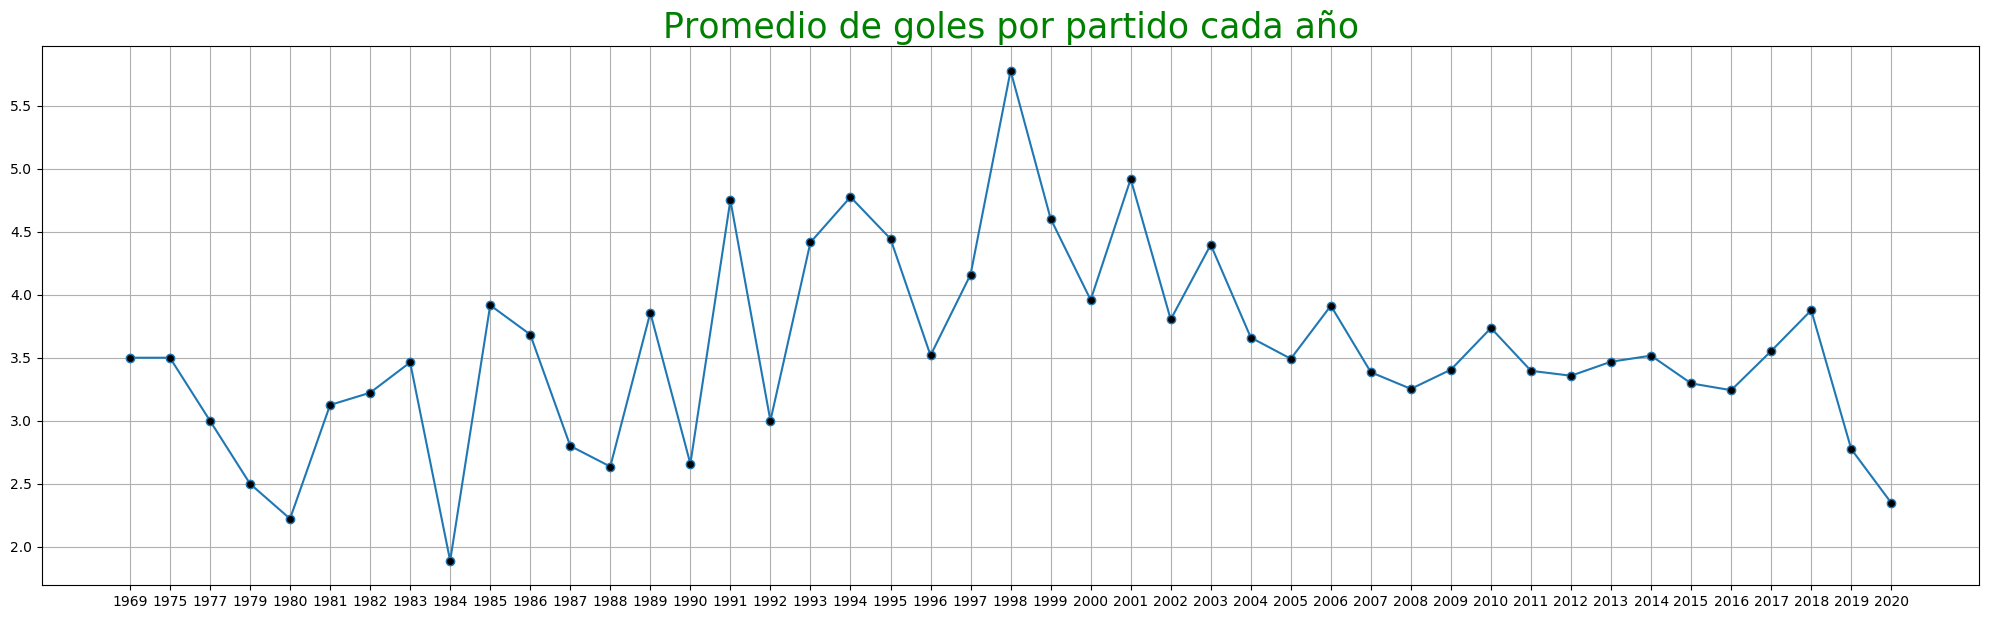

In [35]:
plt.figure(figsize=(25,7))
plt.plot(promedio_goles.index,promedio_goles, marker='o',  markerfacecolor='black')
plt.grid(True)
plt.title('Promedio de goles por partido cada año', color='g', size = 25)
plt.show()

### 5. Paises con mas partidos jugados

In [168]:
partidos_pais_home=df2['home_team'].copy().rename('equipo')
partidos_pais_away=df2['away_team'].copy().rename('equipo')
total_partidos_pais = pd.concat([partidos_pais_home,partidos_pais_away],ignore_index=True)
top_20=total_partidos_pais.value_counts().sort_values(ascending=False)[:20]
top_20

Norway           306
Sweden           297
Germany          271
China PR         270
Denmark          256
United States    239
Portugal         176
France           175
England          174
Finland          174
Italy            170
Japan            163
Iceland          149
Netherlands      141
Canada           131
Brazil           129
Spain            121
Russia           120
Nigeria          116
Switzerland      112
Name: equipo, dtype: int64

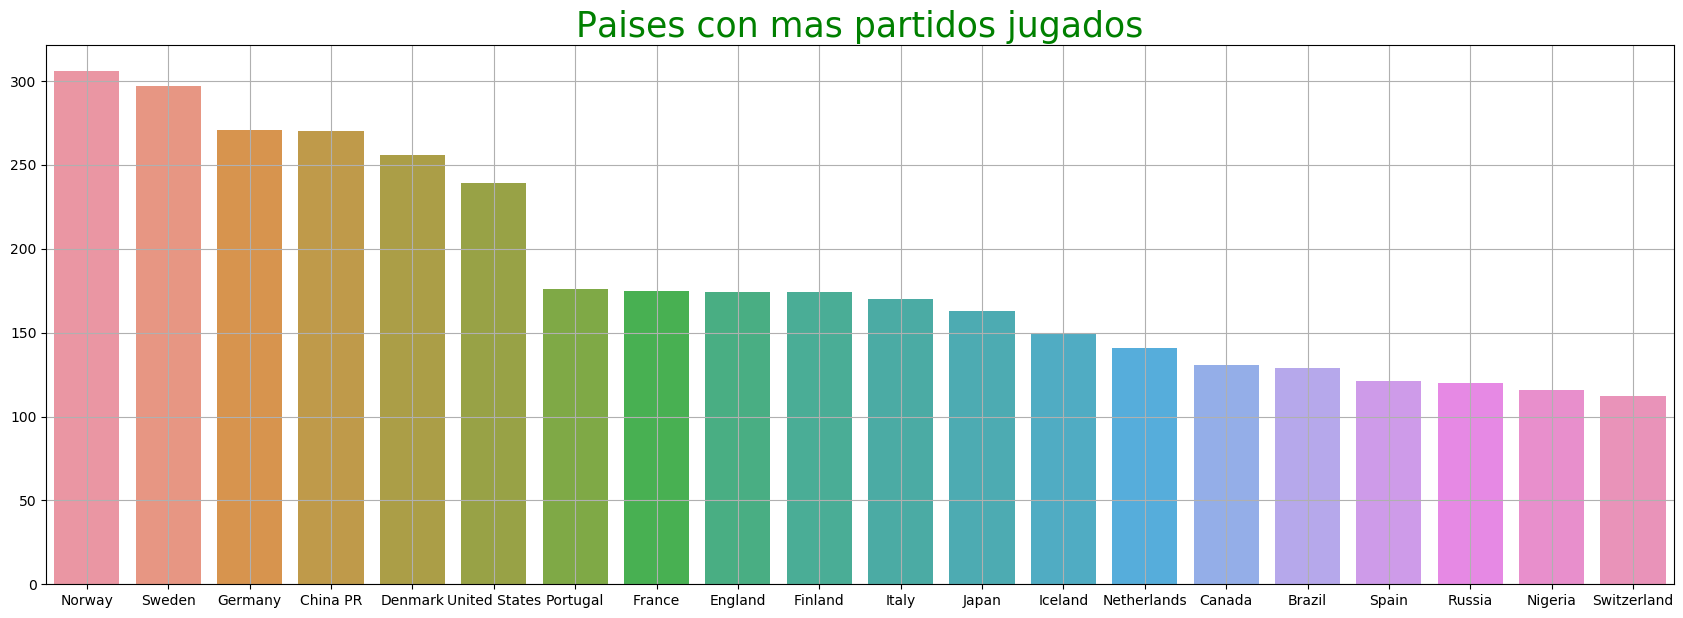

In [37]:
plt.figure(figsize=(21,7))
sns.barplot(top_20.index,top_20)
plt.grid(True)
plt.title('Paises con mas partidos jugados', color='g', size = 25)
plt.show()

### 6. Países con menos partidos jugados

In [158]:
paises_menos_partidos = total_partidos_pais.value_counts().sort_values(ascending=True)[:30]
paises_menos_partidos

Comoros                     1
Yugoslavia                  1
Djibouti                    1
British Virgin Islands      2
Mauritius                   2
Cayman Islands              2
Kuwait                      3
Bahamas                     3
Azerbaijan                  3
Guadeloupe                  3
Kosovo                      3
Curaçao                     3
Lebanon                     3
Bangladesh                  3
Central African Republic    3
Netherlands Antilles        4
Togo                        4
Rwanda                      4
Gambia                      4
Libya                       4
Syria                       4
Great Britain               4
São Tomé and Príncipe       4
Eswatini                    4
Sierra Leone                4
Réunion                     5
India N                     5
Tajikistan                  5
United Arab Emirates        5
Belize                      5
Name: equipo, dtype: int64

Text(0.5, 1.0, 'Países con menos partidos jugados')

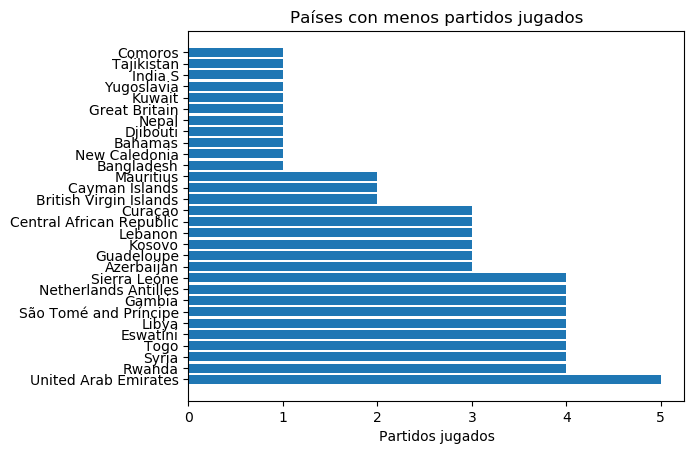

In [39]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(paises_menos_partidos.index, paises_menos_partidos, align='center')
y_pos = paises_menos_partidos
ax.set_yticklabels(paises_menos_partidos.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Partidos jugados')
ax.set_title('Países con menos partidos jugados')

### 7. Número de partidos por torneo

In [40]:
partidos_por_torneo = df2['tournament'].copy().value_counts()
partidos_por_torneo

UEFA Euro qualification               1241
Algarve Cup                            545
FIFA World Cup                         284
AFC Championship                       268
African Championship qualification     226
African Championship                   173
FIFA World Cup qualification           172
Copa América                           157
UEFA Euro                              153
CONCACAF Gold Cup qualification        145
Olympic Games                          130
CONCACAF Gold Cup                      126
AFC Asian Cup qualification            115
Four Nations Tournament                106
AFC Asian Cup                           86
OFC Championship                        78
CONCACAF Championship                   42
OFC Nations Cup                         32
SheBelieves Cup                         30
Euro                                    20
African Cup of Nations                  16
CONCACAF Invitational Tournament         6
OFC Nations Cup qualification            6
Tournoi de 

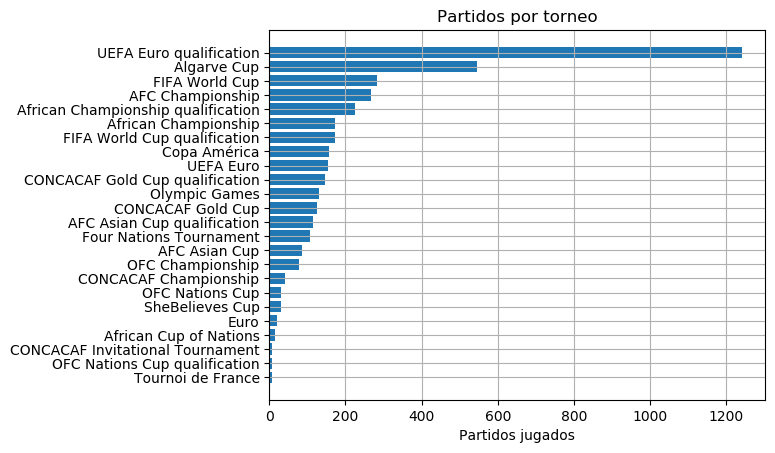

In [41]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(partidos_por_torneo.index, partidos_por_torneo, align='center')
y_pos = partidos_por_torneo
ax.set_yticklabels(partidos_por_torneo.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Partidos jugados')
ax.set_title('Partidos por torneo')
ax.grid(True)

### 8. Paises donde se jugaron mas partidos

In [185]:
paises = df2['country'].copy().value_counts()
paises[:20]

Portugal         580
China PR         225
United States    186
Sweden           102
Germany          100
France            99
Canada            84
Netherlands       76
Italy             76
Vietnam           69
Finland           67
England           62
Norway            62
Australia         59
South Africa      58
Nigeria           57
Hong Kong         57
Thailand          56
Ecuador           55
Denmark           54
Name: country, dtype: int64

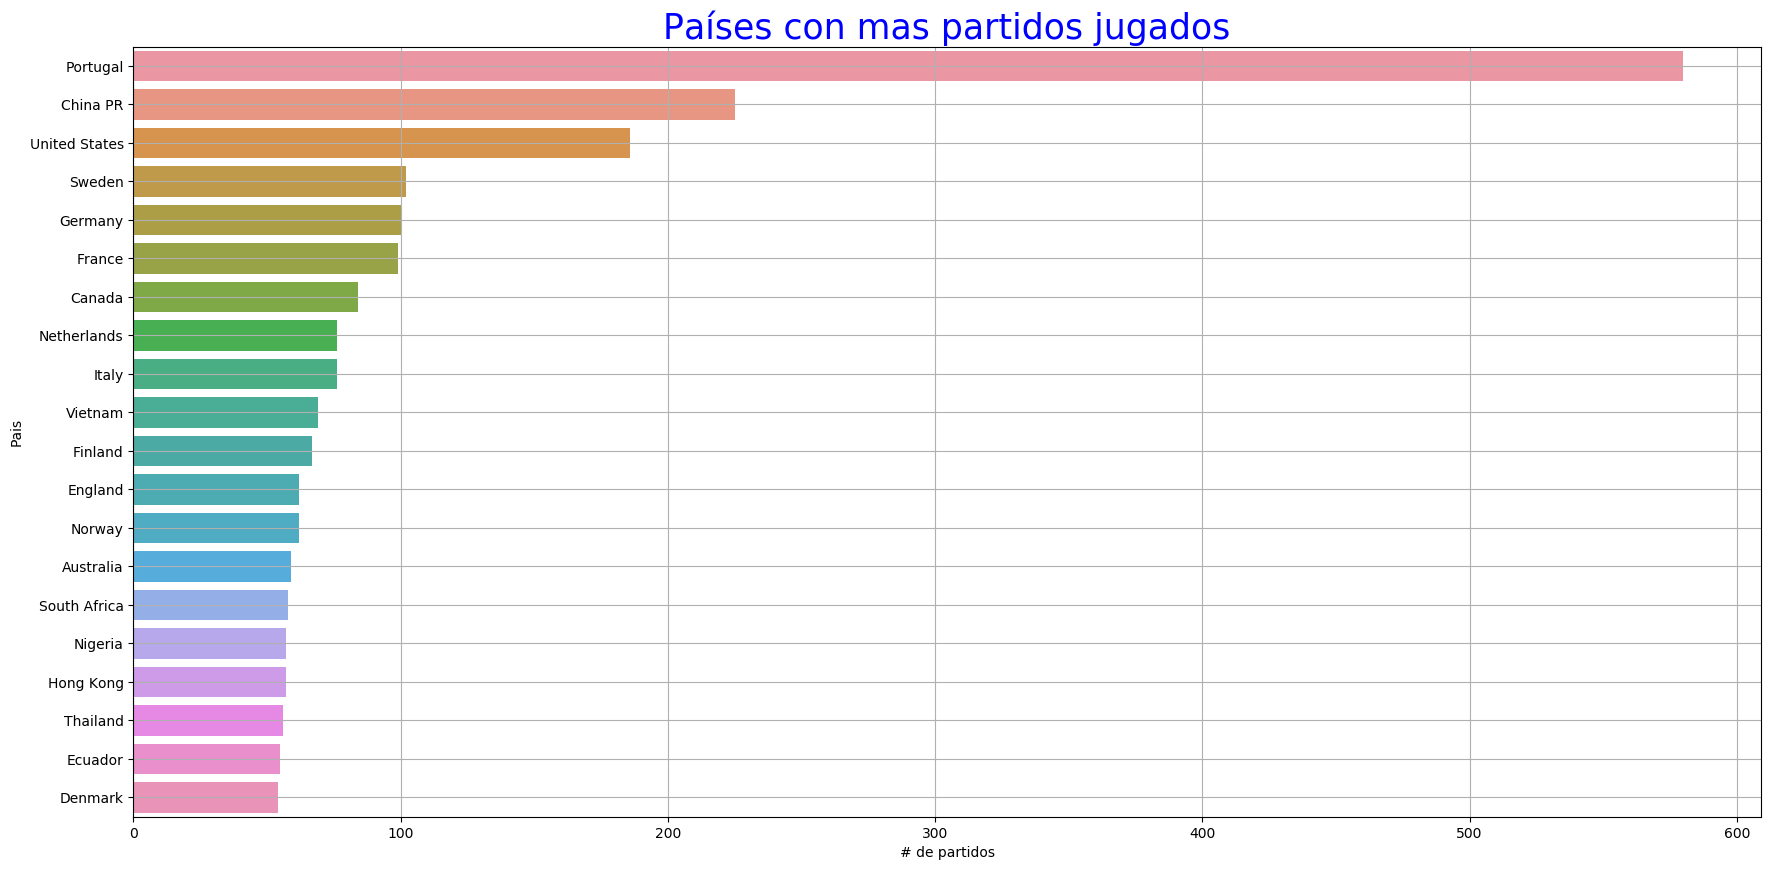

In [219]:
plt.figure(figsize=(21,10))
sns.barplot(y=paises[:20].index, x=paises[:20])
plt.ylabel('Pais')
plt.xlabel('# de partidos')
plt.grid(True)
plt.title('Países con mas partidos jugados', color='b', size = 25)
plt.show()

### 9. Ciudades donde se jugaron mas partidos

In [42]:
ciudades = df2['city'].copy().value_counts()
ciudades

Lagos        85
Albufeira    67
Parchal      60
Hong Kong    57
Guangzhou    55
             ..
Mannheim      1
Brest         1
Porvoo        1
Ankara        1
Nadderud      1
Name: city, Length: 960, dtype: int64

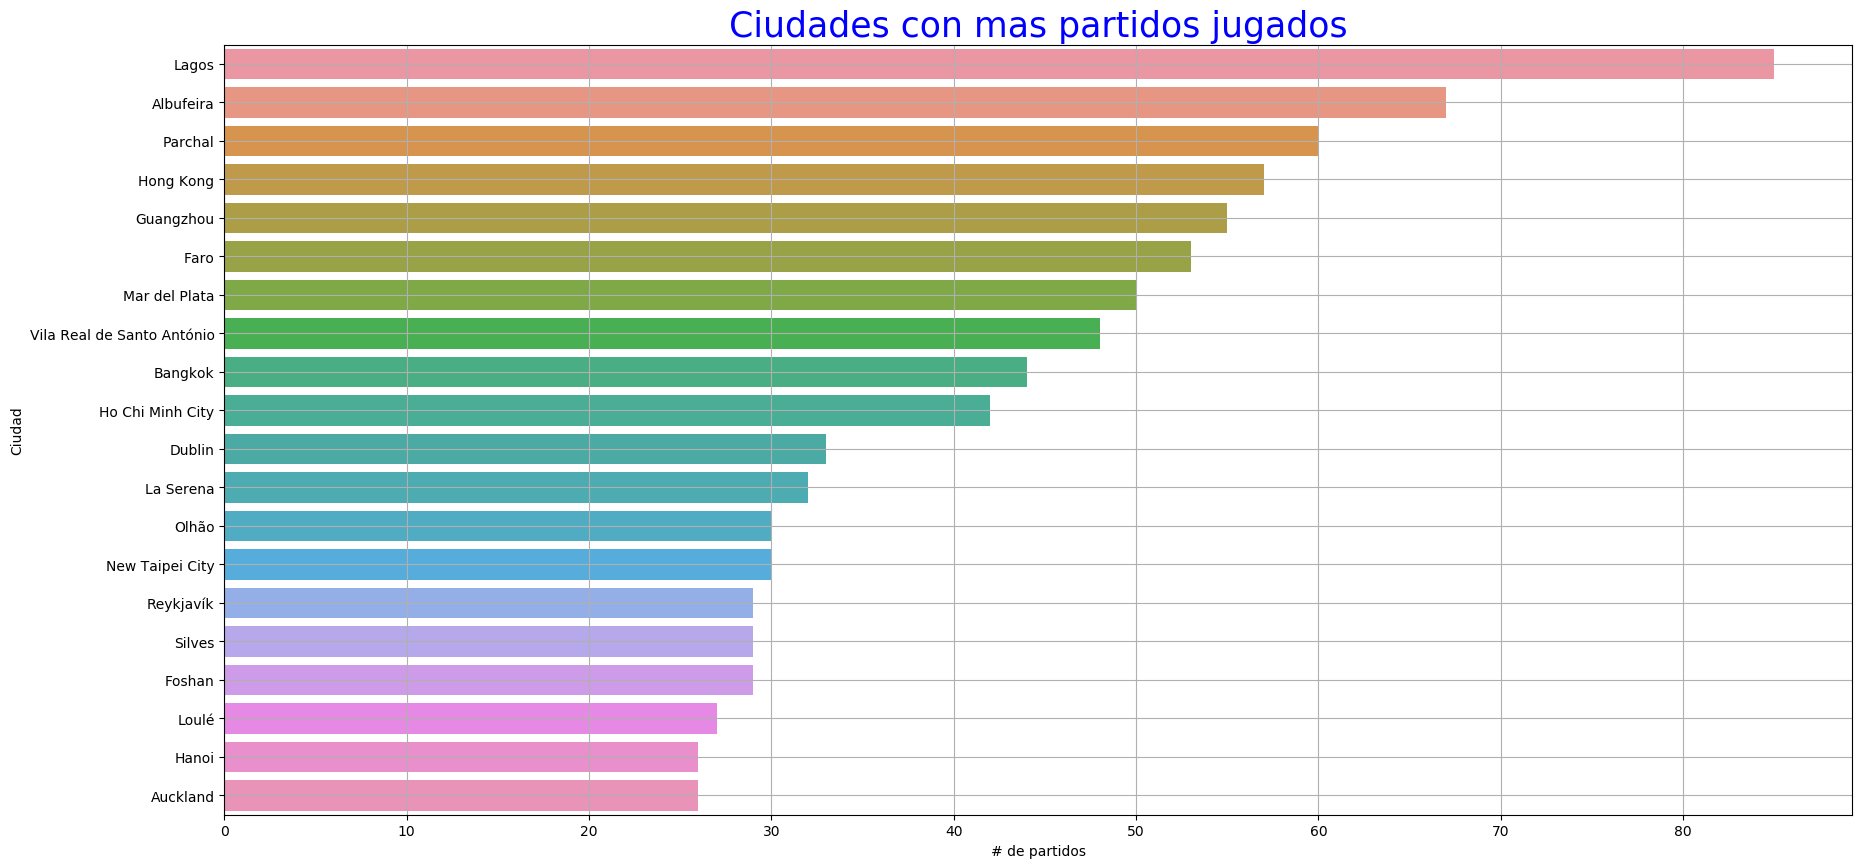

In [43]:
plt.figure(figsize=(21,10))
sns.barplot(y=ciudades[:20].index, x=ciudades[:20])
plt.ylabel('Ciudad')
plt.xlabel('# de partidos')
plt.grid(True)
plt.title('Ciudades con mas partidos jugados', color='b', size = 25)
plt.show()

### 10. Partidos con mas goles

In [44]:
df_partidos = df2[['home_score', 'away_score']].copy()
serie_goles_totales = df_partidos['home_score'] + df_partidos['away_score']
df_partidos['goles_totales']=serie_goles_totales
df_partidos['teams']=df2['home_team'].copy() +'-' + df2['away_team'].copy()
df_partidos= df_partidos.sort_values('goles_totales',ascending=False)
df_partidos[:30]

,home_score,away_score,goles_totales,teams
1987,2,24,26,Cameroon-South Africa
1331,24,0,24,North Korea-Singapore
999,21,0,21,Australia-American Samoa
998,21,0,21,New Zealand-Samoa
2997,21,0,21,Jordan-Kuwait
982,21,0,21,Canada-Puerto Rico
889,21,0,21,Japan-Guam
712,21,0,21,China PR-Philippines
2704,0,20,20,Poland-Russia
1325,19,0,19,North Korea-Guam


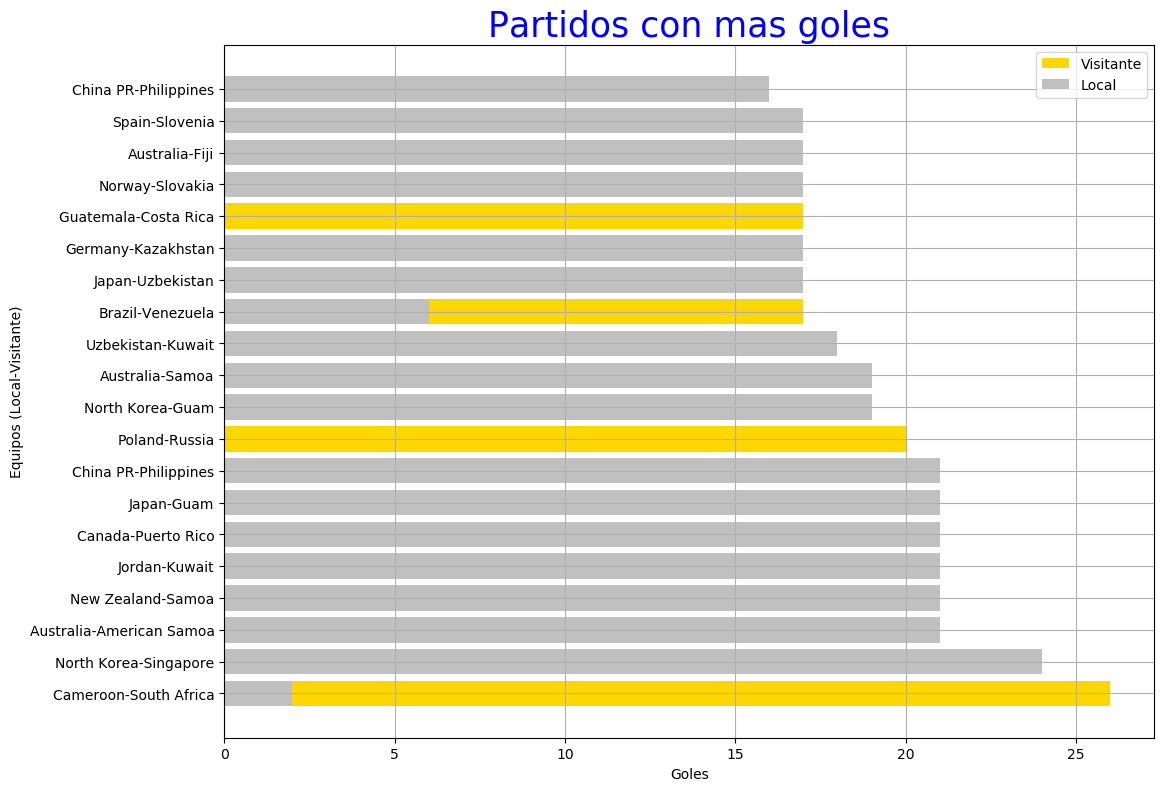

In [45]:
plt.figure(figsize=(12,9))
plt.grid(True)

ind = [y for y, _ in enumerate(df_partidos[:20]['teams'])]

plt.barh(ind, df_partidos[:20]['goles_totales'], height=0.8, label='Visitante', color='gold')
plt.barh(ind, df_partidos[:20]['home_score'], height=0.8, label='Local', color='silver')

plt.yticks(ind, df_partidos[:20]['teams'])
plt.ylabel('Equipos (Local-Visitante)')
plt.xlabel('Goles')
plt.legend(loc='upper right')
plt.title('Partidos con mas goles', color='b', size = 25)

plt.show()

### 11. Partidos con empate por año

In [46]:
df_partidos['year'] = serie
condicion_empate = df_partidos["home_score"] == df_partidos["away_score"]
partidos_empate = df_partidos.loc[condicion_empate]
empates_por_anio = partidos_empate['year'].value_counts().sort_index()
empates_por_anio

1979     4
1980     2
1981     1
1982     2
1983    12
1984     2
1985     1
1986     3
1987     4
1988    13
1989     5
1990     8
1991    10
1992    10
1993     9
1994     9
1995    17
1996    12
1997     6
1998    12
1999    24
2000    15
2001     2
2002    16
2003    28
2004    25
2005     7
2006    24
2007    20
2008    19
2009     8
2010    15
2011    25
2012    21
2013    19
2014    14
2015    24
2016    31
2017    23
2018    58
2019     9
2020     5
Name: year, dtype: int64

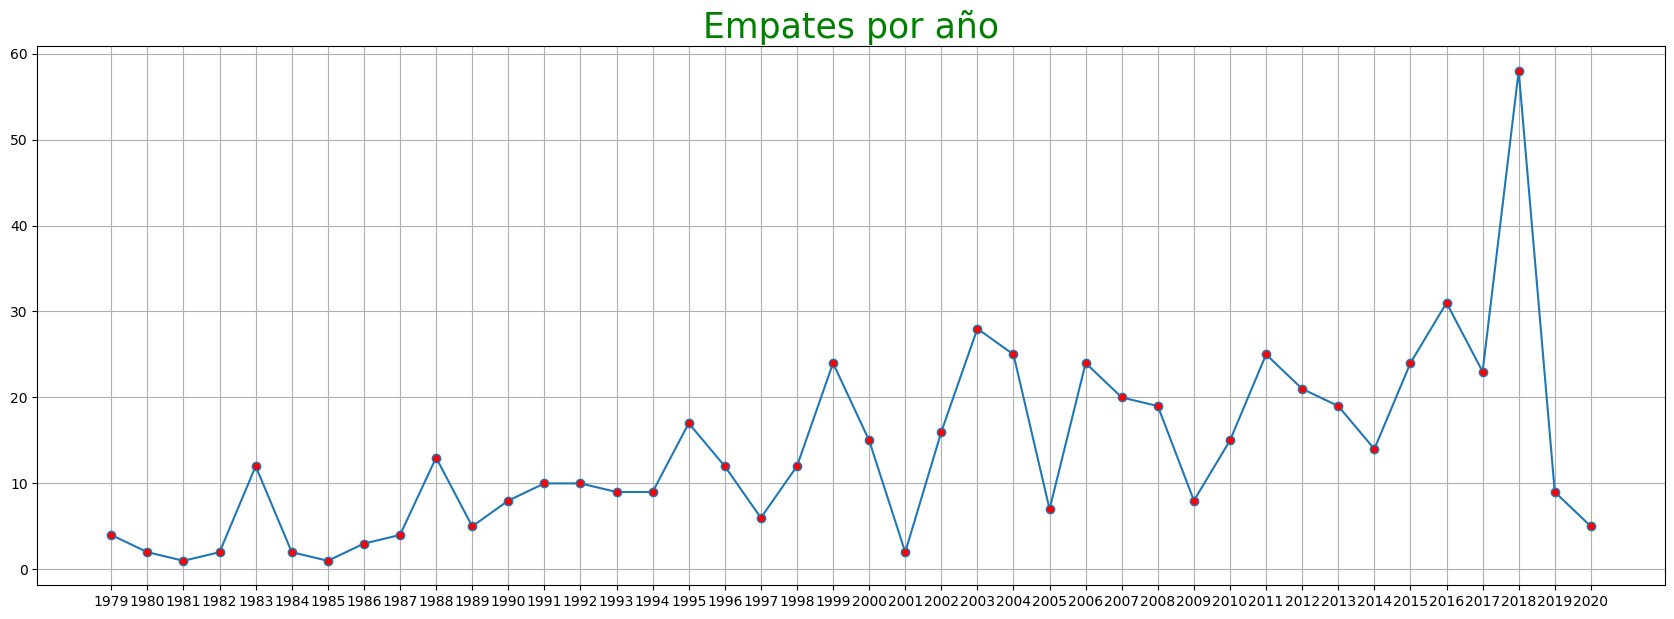

In [47]:
plt.figure(figsize=(21,7))
plt.plot(empates_por_anio.index,empates_por_anio, marker='o',  markerfacecolor='red')
plt.grid(True)
plt.title('Empates por año', color='g', size = 25)
plt.show()

### 12. Victorias en casa

In [85]:
results_home = df2[['home_team',]].copy()
results_home['dif_goles'] = df2['home_score'] - df2['away_score']
condicion_gana = results_home["dif_goles"] > 0
partidos_ganados_casa = results_home.loc[condicion_gana]
partidos_ganados_casa
total_ganados_casa = partidos_ganados_casa['home_team'].value_counts()
total_ganados_casa[:25]

United States     129
Germany           114
China PR          113
Norway            113
Sweden            100
Denmark            66
Japan              56
Brazil             55
Italy              55
England            55
France             51
Canada             46
Nigeria            46
Netherlands        38
Thailand           35
North Korea        35
Chinese Taipei     33
Portugal           33
Australia          29
Iceland            29
Spain              28
Belgium            26
New Zealand        26
South Africa       25
Ghana              25
Name: home_team, dtype: int64

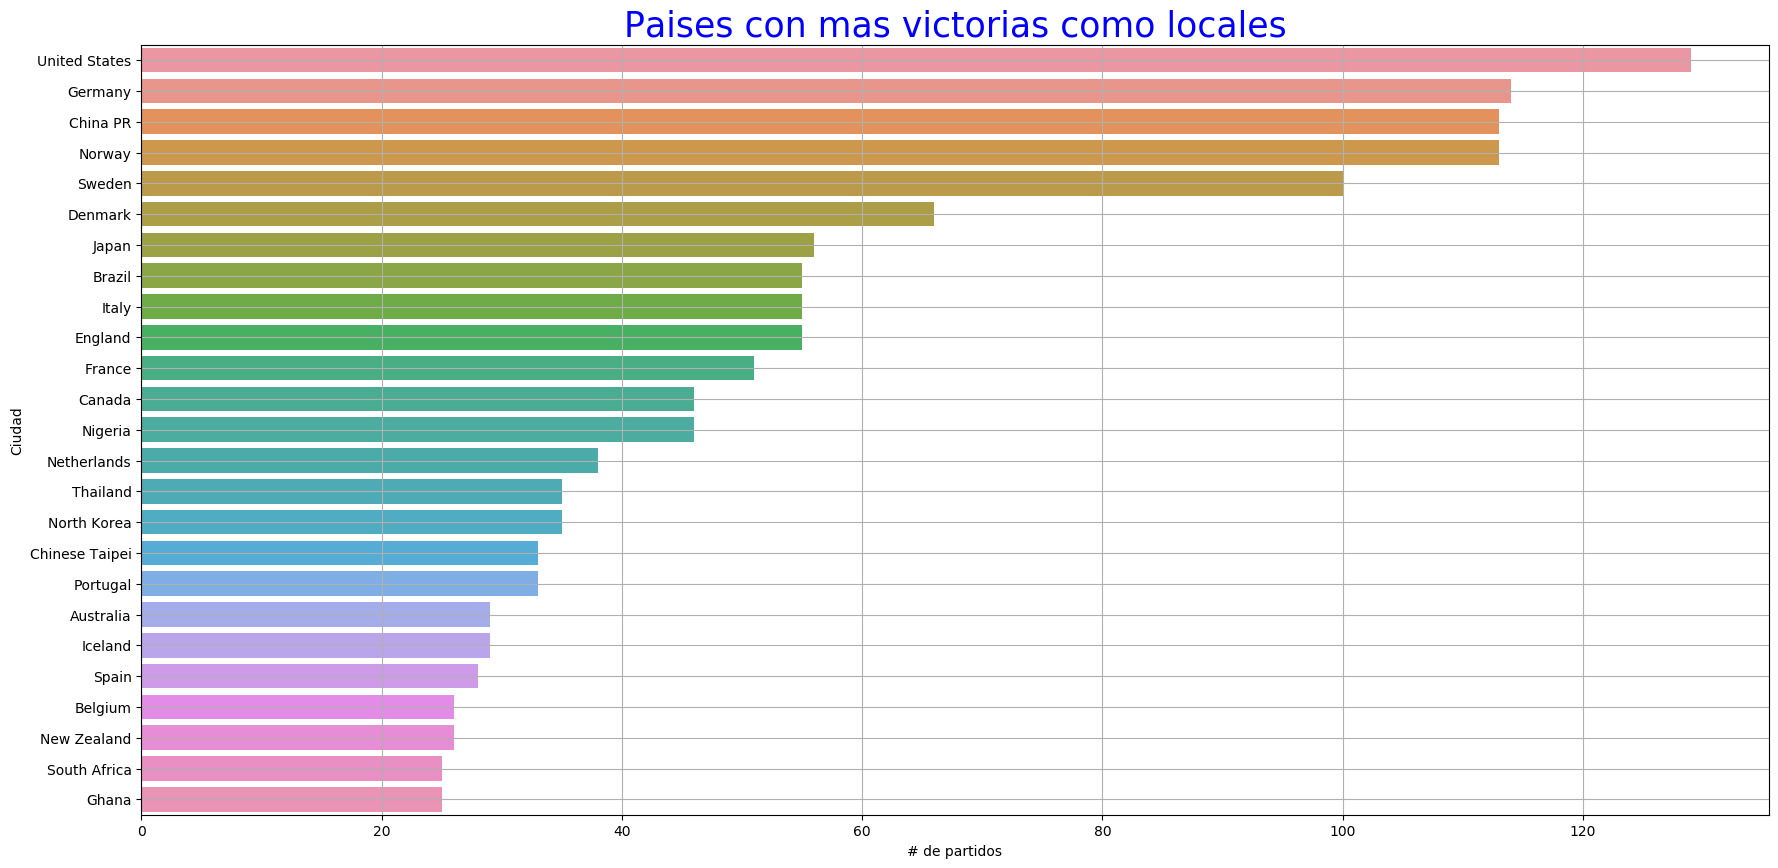

In [86]:
plt.figure(figsize=(21,10))
sns.barplot(y=total_ganados_casa[:25].index, x=total_ganados_casa[:25])
plt.ylabel('Ciudad')
plt.xlabel('# de partidos')
plt.grid(True)
plt.title('Paises con mas victorias como locales', color='b', size = 25)
plt.show()

### 13. Victorias como visitante

In [50]:
results_away = df2[['away_team']].copy()
results_away['dif_goles'] = df2['away_score'] - df2['home_score']
condicion_gana = results_away["dif_goles"] > 0
partidos_ganados_away = results_away.loc[condicion_gana]
total_ganados_away = partidos_ganados_away['away_team'].value_counts()
total_ganados_away

Germany          76
Norway           71
Sweden           65
Denmark          61
United States    54
                 ..
Suriname          1
Georgia           1
Indonesia         1
Ecuador           1
Gabon             1
Name: away_team, Length: 136, dtype: int64

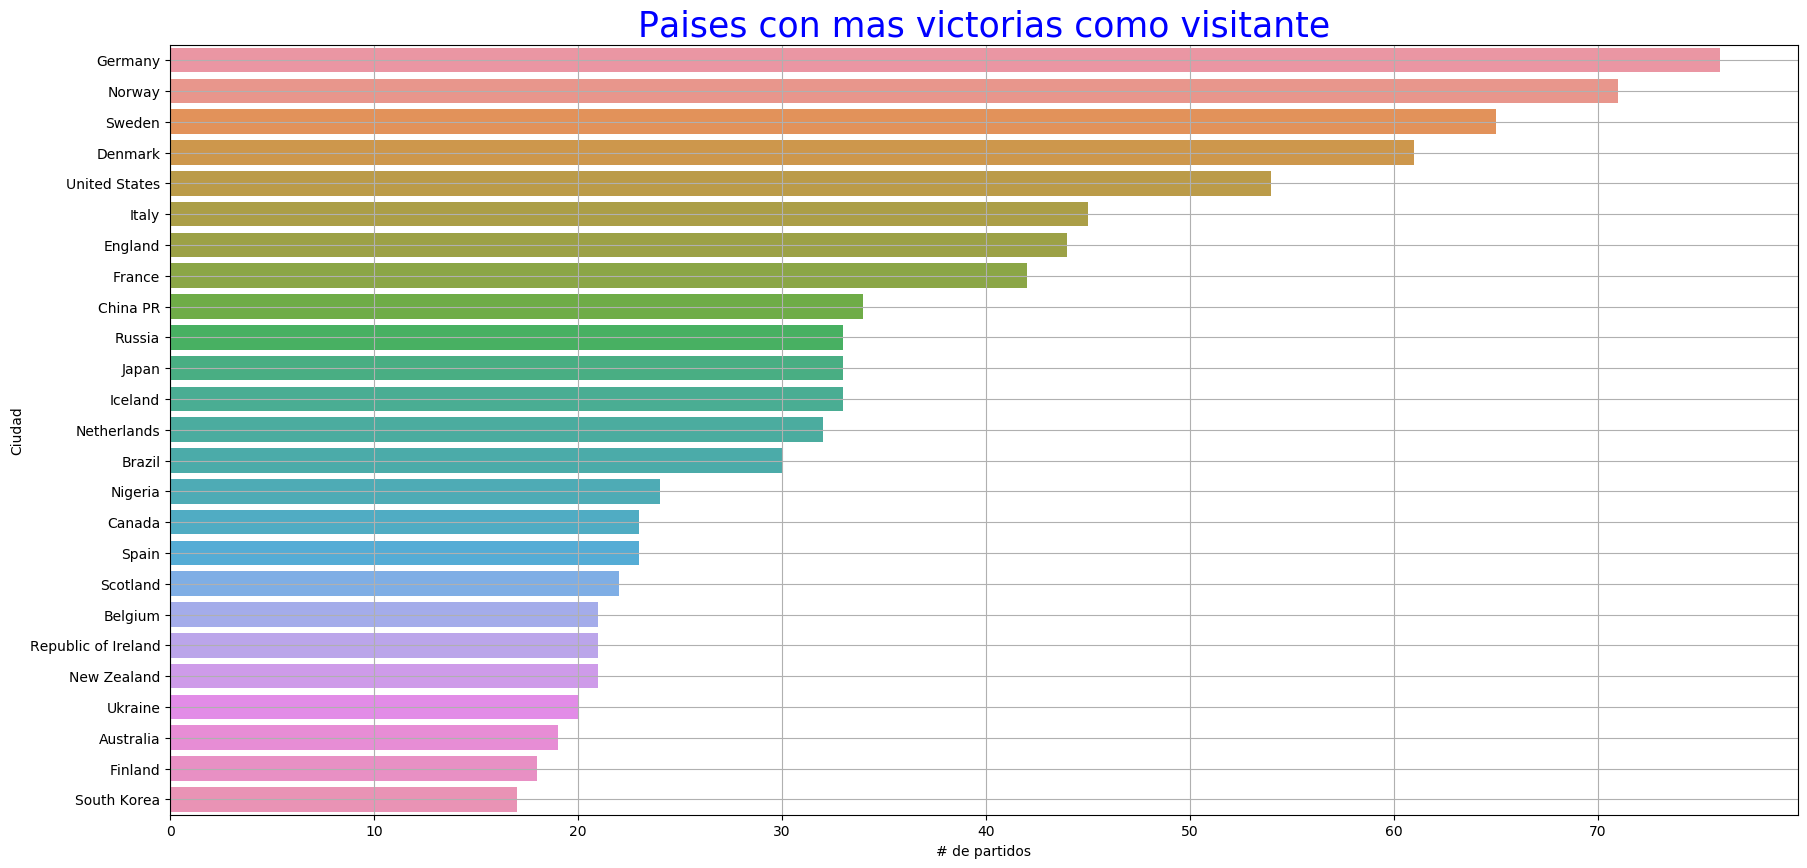

In [51]:
plt.figure(figsize=(21,10))
sns.barplot(y=total_ganados_away[:25].index, x=total_ganados_away[:25])
plt.ylabel('Ciudad')
plt.xlabel('# de partidos')
plt.grid(True)
plt.title('Paises con mas victorias como visitante', color='b', size = 25)
plt.show()

### 14. Victorias totales por pais

In [187]:
results_home=results_home.rename(columns = {'home_team': 'result'})
results_away=results_away.rename(columns = {'away_team': 'result'})
total_results = pd.concat([results_home,results_away],ignore_index=True)
condicion_gana = total_results["dif_goles"] > 0
total_ganados = total_results.loc[condicion_gana]
serie_result = total_ganados['result']
serie_result

0          Italy
1        Denmark
2        England
3          Italy
4       Thailand
          ...   
8317      Sweden
8318     England
8322     Denmark
8323      Norway
8324       Spain
Name: result, Length: 3589, dtype: object

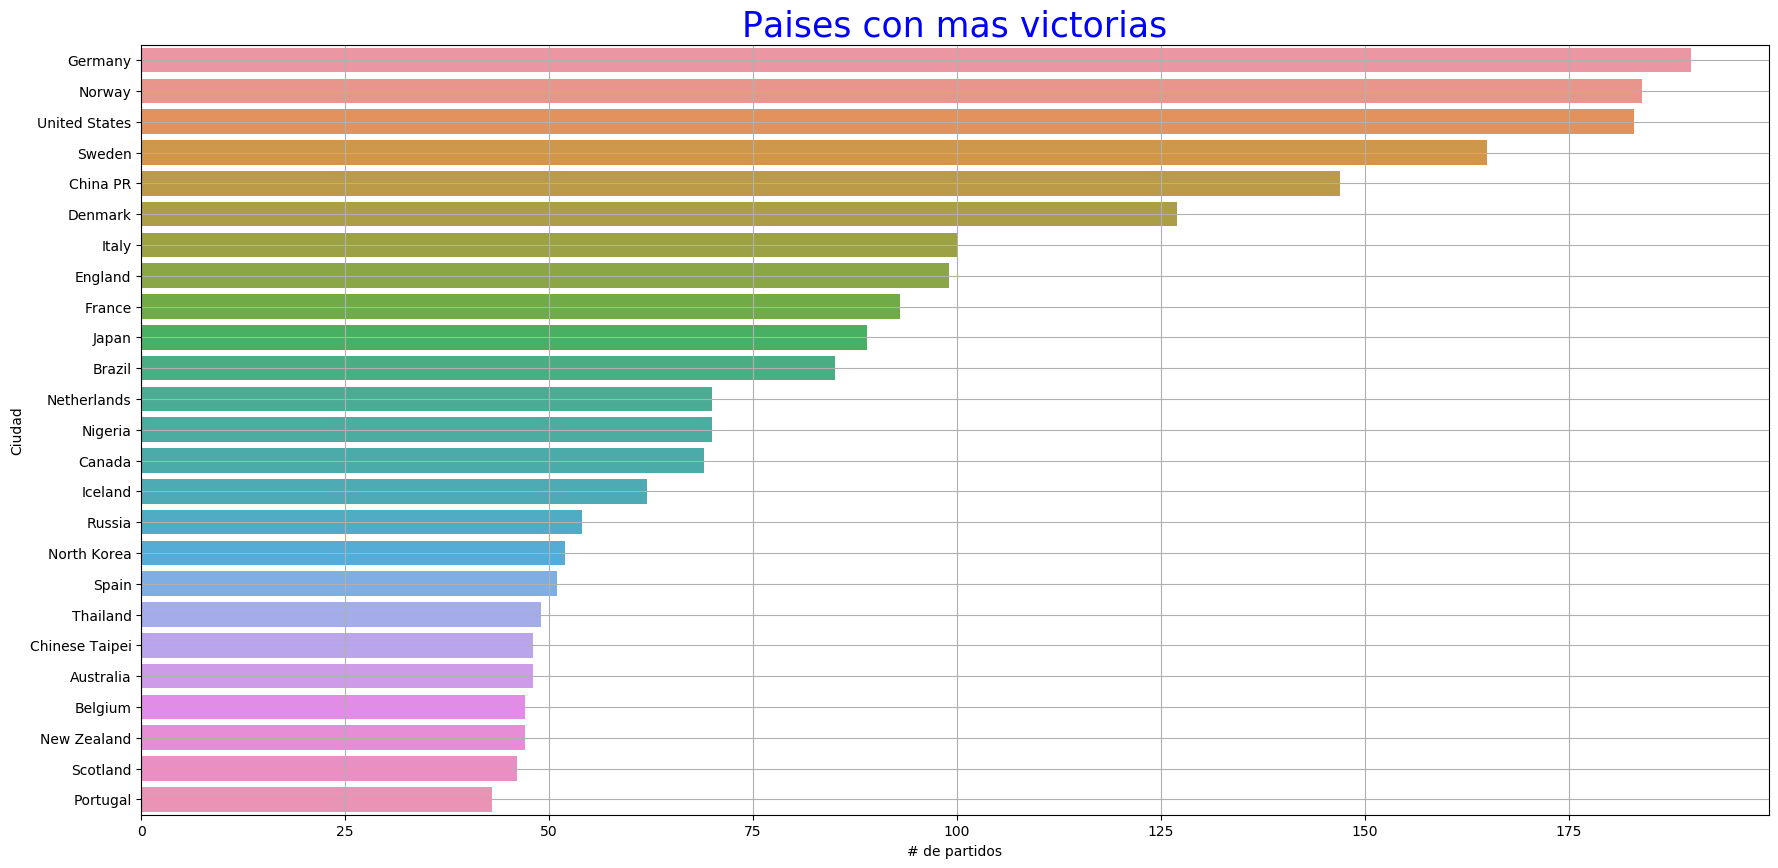

In [101]:
plt.figure(figsize=(21,10))
sns.barplot(y=serie_result.value_counts().index[:25], x=serie_result.value_counts()[:25])
plt.ylabel('Ciudad')
plt.xlabel('# de partidos')
plt.grid(True)
plt.title('Paises con mas victorias', color='b', size = 25)
plt.show()

### 15. Empates por país

In [61]:
condicion_empate_team = results_home["dif_goles"] == 0
partidos_empatados_casa = results_home.loc[condicion_empate_team]
partidos_empatados_away = results_away.loc[condicion_empate_team]
empates = partidos_empatados_casa['home_team'].value_counts() + partidos_empatados_away['away_team'].value_counts()
partidos_empatados_totales = empates.fillna(1).sort_values(ascending=False)
partidos_empatados_totales[:26]

Sweden                 52.0
Norway                 42.0
China PR               42.0
Germany                38.0
Denmark                35.0
France                 34.0
Finland                33.0
United States          32.0
England                29.0
Netherlands            29.0
Portugal               27.0
Italy                  26.0
Spain                  25.0
Iceland                23.0
Australia              23.0
Belgium                23.0
Switzerland            22.0
Romania                21.0
Russia                 19.0
Canada                 18.0
Republic of Ireland    17.0
Hungary                15.0
Cameroon               15.0
Brazil                 14.0
Japan                  13.0
Poland                 13.0
dtype: float64

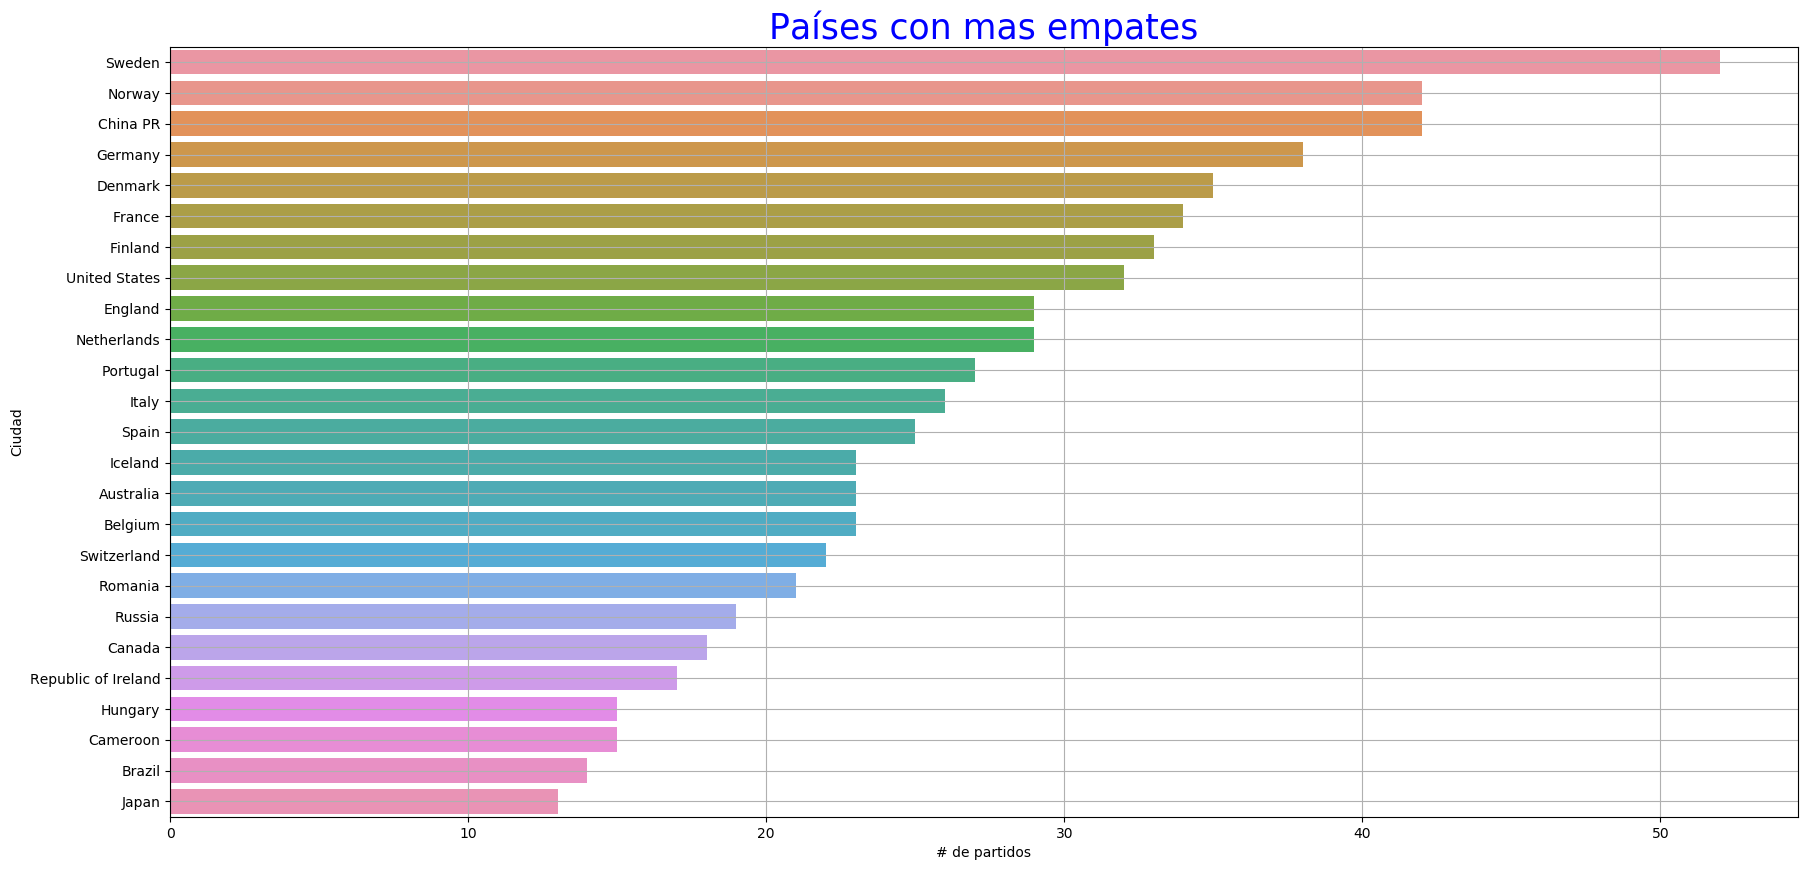

In [60]:
plt.figure(figsize=(21,10))
sns.barplot(y=partidos_empatados_totales[:25].index, x=partidos_empatados_totales[:25])
plt.ylabel('Ciudad')
plt.xlabel('# de partidos')
plt.grid(True)
plt.title('Países con mas empates', color='b', size = 25)
plt.show()

### 16. Partidos perdidos por país

In [104]:
condicion_pierde = total_results["dif_goles"] < 0
total_pierde = total_results.loc[condicion_pierde]
serie_pierde= total_pierde['result']
serie_pierde.value_counts()[:25]

Portugal               106
Finland                101
Denmark                 94
China PR                81
Sweden                  80
Norway                  80
Iceland                 64
Japan                   61
Hungary                 53
Switzerland             51
Northern Ireland        50
France                  48
Russia                  47
Wales                   47
England                 46
Hong Kong               45
Spain                   45
Scotland                44
Italy                   44
Poland                  44
Republic of Ireland     44
Canada                  44
Germany                 43
Netherlands             42
Estonia                 40
Name: result, dtype: int64

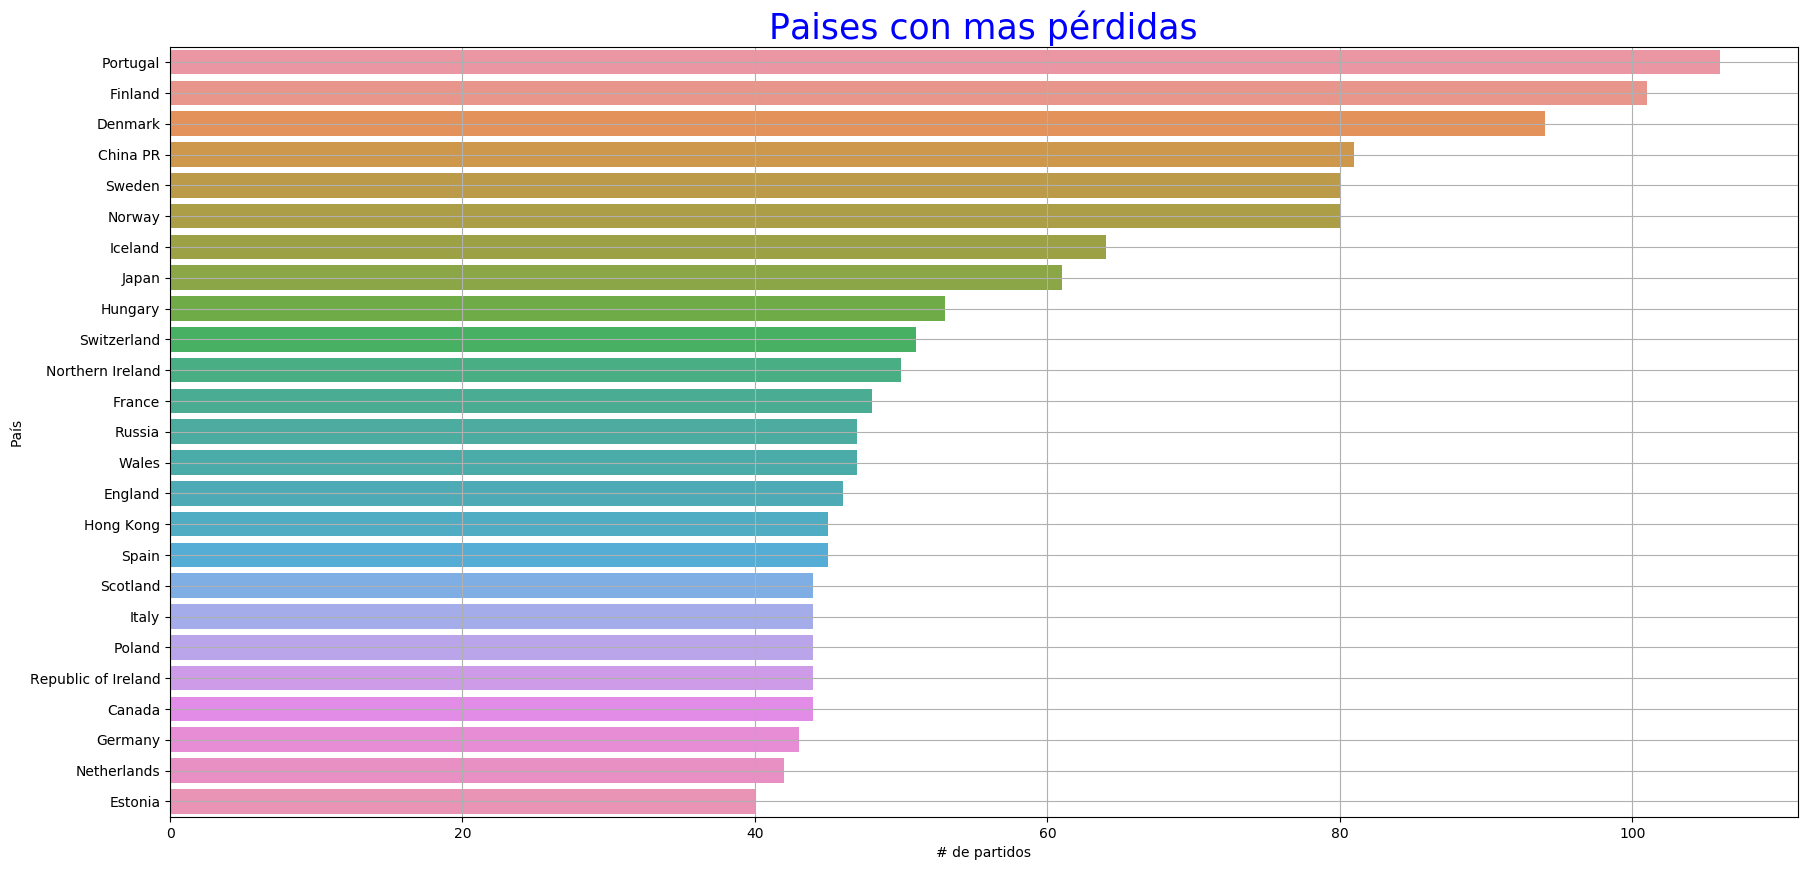

In [105]:
plt.figure(figsize=(21,10))
sns.barplot(y=serie_pierde.value_counts().index[:25], x=serie_pierde.value_counts()[:25])
plt.ylabel('País')
plt.xlabel('# de partidos')
plt.grid(True)
plt.title('Paises con mas pérdidas', color='b', size = 25)
plt.show()

### 17. Promedio de partidos ganados

In [182]:
promedio_ganados = serie_result.value_counts()/total_partidos_pais.value_counts()
promedio_partidos_ganados = promedio_ganados.sort_values(ascending=False)
promedio_partidos_ganados = promedio_partidos_ganados.fillna(0)
promedio_partidos_ganados[:20]

United States            0.765690
Netherlands Antilles     0.750000
Great Britain            0.750000
Germany                  0.701107
Brazil                   0.658915
North Korea              0.604651
Nigeria                  0.603448
Norway                   0.601307
Jordan                   0.600000
Italy                    0.588235
Chinese Taipei           0.578313
India S                  0.571429
Dominican Republic       0.571429
Ghana                    0.569444
England                  0.568966
Thailand                 0.556818
Sweden                   0.555556
Saint Kitts and Nevis    0.555556
Haiti                    0.552632
Japan                    0.546012
dtype: float64

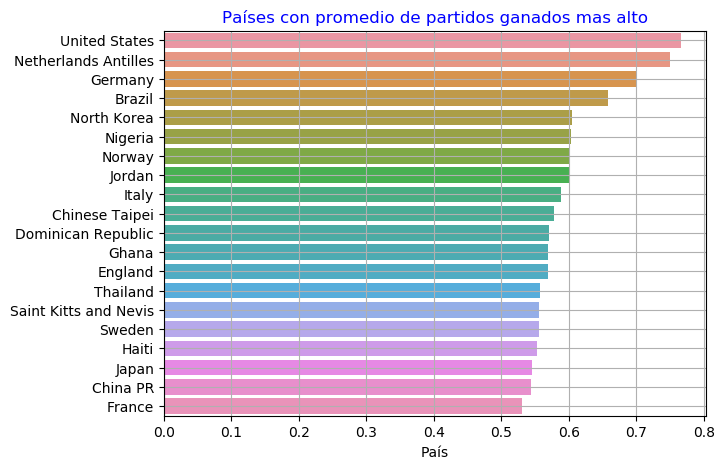

In [131]:
plt.figure(figsize=(7,5))
sns.barplot(y=promedio_partidos_ganados.index[:20], x=promedio_partidos_ganados[:20])
plt.xlabel('País')
plt.grid(True)
plt.title('Países con promedio de partidos ganados mas alto', color='b', size = 12)
plt.show()

### 18. Países con mas goles.

In [220]:
goles_metidos_home = df2[['home_team','home_score']].copy().rename(columns = {'home_score': 'a_favor','home_team':'team'})
goles_metidos_away = df2[['away_team','away_score']].copy().rename(columns = {'away_score': 'a_favor','away_team':'team'})
goles_a_favor = pd.concat([goles_metidos_home,goles_metidos_away])
goles_a_favor = goles_a_favor.groupby('team').sum().sort_values('a_favor')
goles_a_favor[-20:]

,a_favor
team,
Russia,221
South Korea,229
Spain,240
Iceland,267
North Korea,287
Nigeria,290
Australia,290
Canada,310
France,325


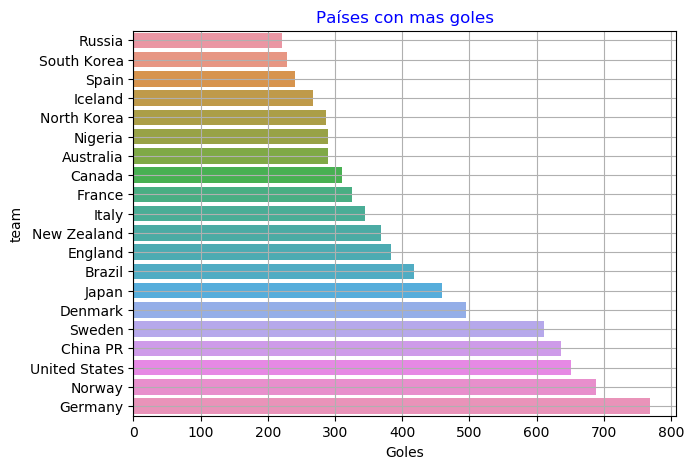

In [222]:
plt.figure(figsize=(7,5))
sns.barplot(y=goles_a_favor.index[-20:], x=goles_a_favor['a_favor'][-20:])
plt.xlabel('Goles')
plt.grid(True)
plt.title('Países con mas goles', color='b', size = 12)
plt.show()

### 19. Países con mas goles en contra

In [226]:
goles_recibidos_home = df2[['home_team','away_score']].copy().rename(columns = {'away_score': 'en_contra','home_team':'team'})
goles_recibidos_away = df2[['away_team','home_score']].copy().rename(columns = {'home_score': 'en_contra','away_team':'team'})
goles_en_comtra = pd.concat([goles_recibidos_home,goles_recibidos_away])
goles_en_comtra = goles_en_comtra.groupby('team').sum().sort_values('en_contra')
goles_en_comtra[-20:]

,en_contra
team,
Italy,175
England,178
France,181
Malaysia,187
Poland,190
Estonia,191
Northern Ireland,196
Japan,198
Thailand,200


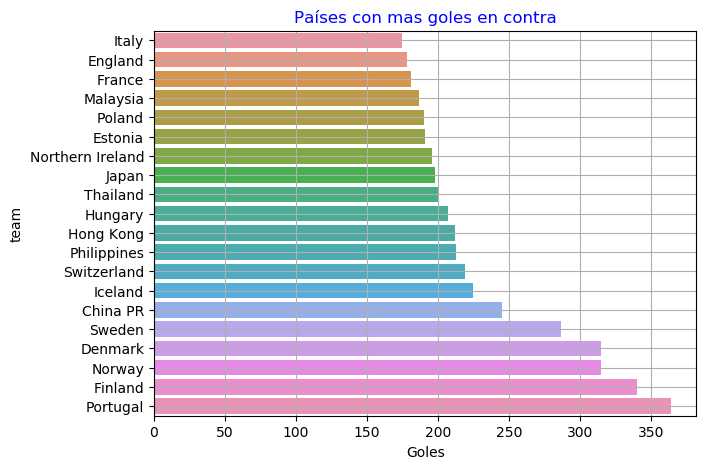

In [229]:
plt.figure(figsize=(7,5))
sns.barplot(y=goles_en_comtra.index[-20:], x=goles_en_comtra['en_contra'][-20:])
plt.xlabel('Goles')
plt.grid(True)
plt.title('Países con mas goles en contra', color='b', size = 12)
plt.show()

### 20. Promedio de goles

In [239]:
a = goles_a_favor['a_favor']/total_partidos_pais.value_counts()
a=a.sort_values()
a[-20:]

Togo                     2.500000
Uzbekistan               2.593750
Chinese Taipei           2.650602
South Korea              2.662791
Australia                2.685185
Mozambique               2.714286
Costa Rica               2.716981
United States            2.723849
Japan                    2.822086
Germany                  2.837638
Cuba                     2.875000
Jamaica                  2.925000
Trinidad and Tobago      2.927273
Puerto Rico              2.928571
Saint Kitts and Nevis    3.000000
Brazil                   3.232558
North Korea              3.337209
Lebanon                  4.000000
New Zealand              4.000000
Jordan                   4.800000
dtype: float64

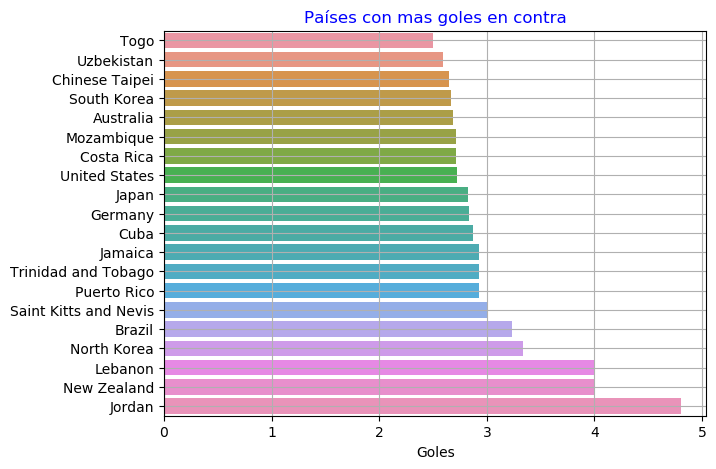

In [240]:
plt.figure(figsize=(7,5))
sns.barplot(y=a.index[-20:], x=a[-20:])
plt.xlabel('Goles')
plt.grid(True)
plt.title('Países con mas goles en contra', color='b', size = 12)
plt.show()